# Netflix Popularity Analysis

*  Popularity of Flim by Genre (SQL)
*  Popularity of Flim by Countries (SQL) 
*  Pupluar Directors on the Netflix (SQL)
*  Demonstration of Relationship between Runtime and Imbd score (Python)


### Popularity of Flim by Genre

* MY SQL Query 

with cte12 as (select sum(imdb_votes) popular_genre
from titles  
where genres like '%action%' 
union all  
select sum(imdb_votes) popular_genre
from titles  
where genres like '%drama%' 
union all  
select sum(imdb_votes) popular_genre
from titles  
where genres like '%animation%' 
union all  
select sum(imdb_votes) popular_genre
from titles  
where genres like '%comedy%' 
union all  
select sum(imdb_votes) popular_genre
from titles  
where genres like '%crime%' 
union all  
select sum(imdb_votes) popular_genre
from titles  
where genres like '%documentation%' 
union all 
select sum(imdb_votes) popular_genre
from titles  
where genres like '%european%' 
union all 
select sum(imdb_votes) popular_genre
from titles  
where genres like '%family%' 
union all  
select sum(imdb_votes) popular_genre
from titles  
where genres like '%fantasy%' 
union all 
select sum(imdb_votes) popular_genre
from titles  
where genres like '%horror%' 
union all  
select sum(imdb_votes) popular_genre
from titles  
where genres like '%music%' 
union all  
select sum(imdb_votes) popular_genre
from titles  
where genres like '%romance%' 
union all 
select sum(imdb_votes) popular_genre
from titles  
where genres like '%scifi%' 
union all 
select sum(imdb_votes) popular_genre
from titles  
where genres like '%sport%' 
union all 
select sum(imdb_votes) popular_genre
from titles  
where genres like '%thriller%' 
union all 
select sum(imdb_votes) popular_genre
from titles  
where genres like '%war%' 
union all 
select sum(imdb_votes) popular_genre
from titles  
where genres like '%western%')
select *, 
case when popular_genre = 45006009 then 'action' 
when popular_genre = 89220112 then 'drama' 
when popular_genre = 7531430 then 'animation' 
when popular_genre = 35363513 then 'comedy' 
when popular_genre = 38791635 then 'crime' 
when popular_genre = 4372279 then 'documentation' 
when popular_genre = 15001328 then 'european' 
when popular_genre = 7041502 then 'family' 
when popular_genre = 19425742 then 'fantasy' 
when popular_genre = 15579687 then 'horror' 
when popular_genre = 4011251 then 'music' 
when popular_genre = 18770789 then 'rommance' 
when popular_genre = 26063008 then 'Scifi' 
when popular_genre = 3473177 then 'Sport' 
when popular_genre = 58903190 then 'thriller' 
when popular_genre = 6952723 then 'war' 
when popular_genre = 3532478 then 'western' 
end as genre 
from cte12 
order by popular_genre desc;

### Popularity of Flim by countries 

* MY SQL Query

with cte1 as (select substr(production_countries, 3,2) country1, genres, imdb_score, imdb_votes 
              from titles 
			  union all  
			  select substr(production_countries, 9,2) country2, genres, imdb_score, imdb_votes 
			  from titles 
			  union all  
			  select substr(production_countries, 15,2) country3, genres, imdb_score, imdb_votes 
              from titles 
			  union all  
			  select substr(production_countries, 21,2) country4, genres, imdb_score, imdb_votes 
			  from titles 
			  union all  
			  select substr(production_countries, 27,2) country5, genres, imdb_score, imdb_votes 
			  from titles 
			  union all  
			  select substr(production_countries, 33,2) country6, genres, imdb_score, imdb_votes 
			  from titles) 
select country1, sum(imdb_votes)
from cte1 
where country1 != '' 
group by country1
order by 2 desc;

### Pupluar Directors on the Netflix

* My SQL Query

select name, sum(imdb_votes)
from titles t
inner join credits c
on t.id = c.id
where role = 'director'
group by name
order by sum(imdb_votes) desc;

### Demonstration of Relationship between Runtime and Imbd score

In [5]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import spearmanr


runtime = pd.read_csv('runtime.csv')

runtime

,runtime,imdb_score,imdb_votes
0,69,5.4,154
1,23,6.7,154
2,46,5.1,155
3,63,5.7,155
4,47,6.8,156
...,...,...,...
995,139,3.9,748
996,94,5.3,748
997,29,7.0,749
998,0,6.1,750


#### how runtime affects to imdb score & popularity ? 
#### before I demonstrated the relationship, I checked three following things 

* runtime and imdb score & popularity are linear relationship ? 
* Are there outliers ?
* the runtime data is normal distribution ? 

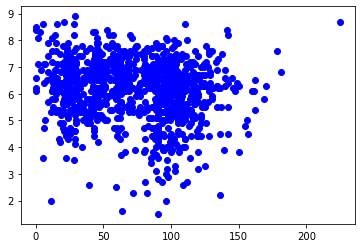

In [6]:
# x and y are linear? & outliar? 

x = runtime['runtime']
y = runtime['imdb_score']
z = runtime['imdb_votes']

plt.scatter(x, y, c ="blue") # relationship between runtime and imdb score


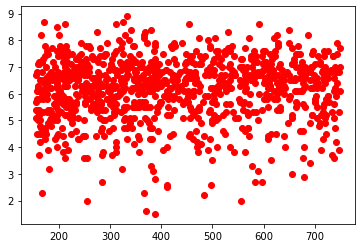

In [7]:
plt.scatter(z, y, c ="red") #relationship between runtime and imdb score

C:\Users\junhy\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


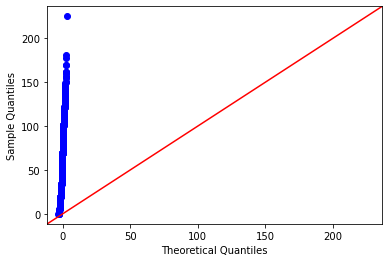

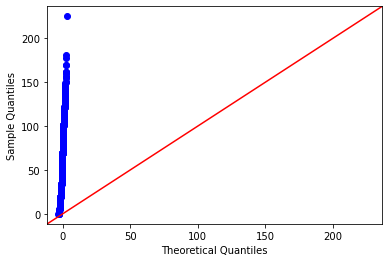

In [8]:
# runtime data is normal distribution ? 

sm.qqplot(runtime["runtime"], line="45") # the runtime data is not normal distribution because it doesn't lies on line 45

#### Therefore I have to use spearman's rank correlation coefficient, instead of pearson correlation coefficient

In [21]:
spearmanr(runtime['runtime'], runtime['imdb_score'])

SpearmanrResult(correlation=-0.15567380501185143, pvalue=7.541667460895122e-07)

In [27]:
spearmanr(runtime['runtime'], runtime['imdb_votes'])

SpearmanrResult(correlation=-0.050383570212449304, pvalue=0.11132023397292067)

# Relationship between runtime and imdb score 

## p value is less than 0.05, the correlation is statiscally significant. However, the correlation is -0.156, which is very weak relationship.

# Relationship between runtime and popularity

## p value is higher than 0.05, the correlation is not statiscally significant. Therefore, there is no relationship between them 